*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

This notebook introduces the concept and methodology of generating variograms.

# Spatial Data Simulation

Let's say that you are a spatial data analyst of a gold mining company, and want to know the distribution of gold percentage over 100m x 100m mining area. To understand the characteritics of the rock formations, you take 100 random rock samples from the mining area, but obviously these 100 data points are not enough to estimate gold percentage over every single spatial locations in the area. So you analyze the available data (100 rock samples from random locations) and simulate full 2D-surface plot for gold percentage over the mining area.

This 2D surface simulation from sparse spatial data is a sequential process that involves many complicated statistical techniques. 

Steps:

1. Plot variogram
2. Fit variogram vodel
3. Apply kriging
4. Apply simulation on top of Kriging
5. Run simulation multiple times and perform additioanl data analyses as needed

In this post, the concepts, theory, and methodology of plotting a **variogram** will be covered. 


# Basics of Variograms

> **Variogram** is a measure of dissimilarity over a distance. It shows how two data points are correlated from a spatial perspective, and provides useful insights when trying to estimate the value of an unknown location using collected sample data from other locations.

In [138]:
import random
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
%matplotlib notebook

In [164]:
data = pd.read_excel('sample_data/2D_Data.xlsx', sheet_name='truth_1', header=None)
data = data.apply(lambda x: (x + 3.47) * 0.75)

<IPython.core.display.Javascript object>


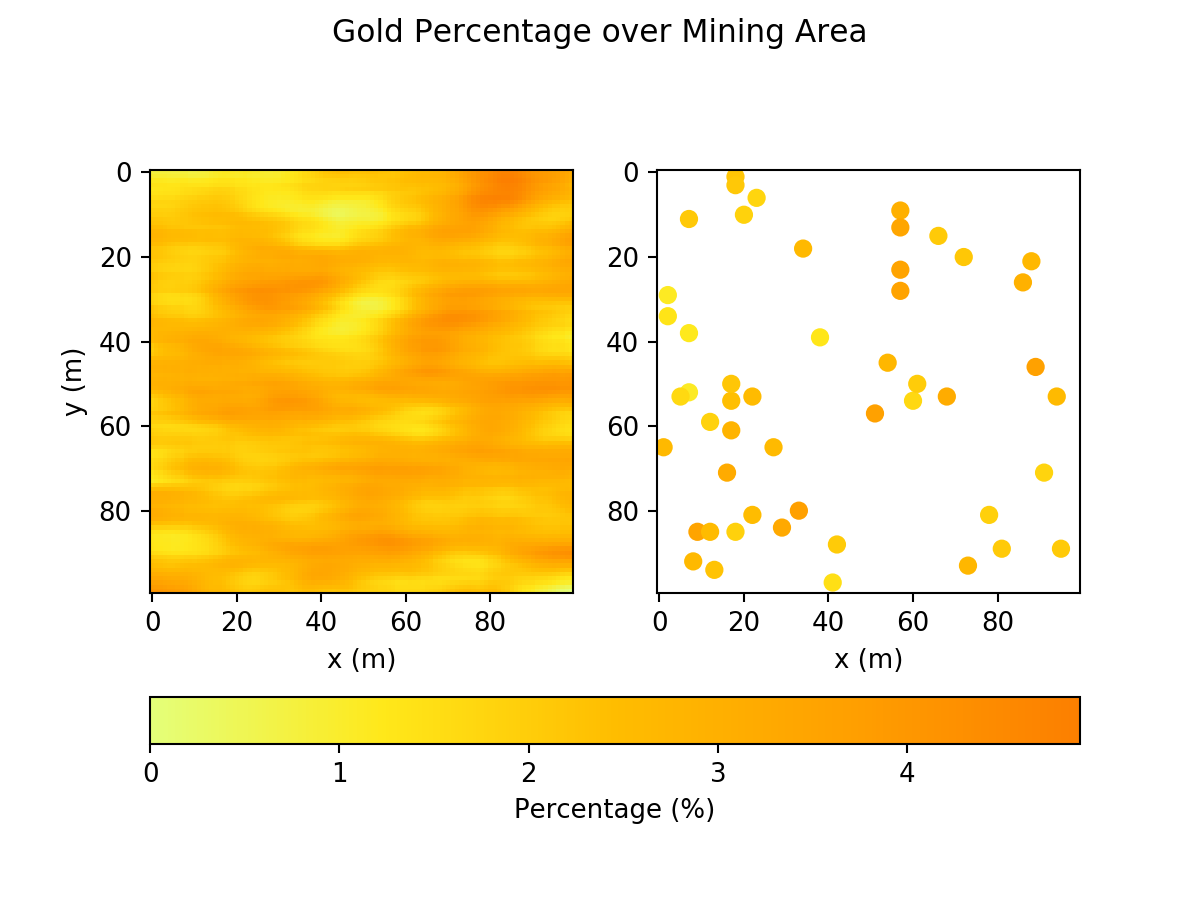

In [155]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.suptitle('Gold Percentage over Mining Area')
original_data = np.array(data)

N = 50

x = np.random.randint(0,100,size=N)
y = np.random.randint(0,100,size=N)

random_sample = original_data[x,y]

im = ax1.imshow(data, cmap=cm.Wistia)
sc = ax2.scatter(x,y,c=random_sample, cmap=im.cmap, norm=im.norm)

ax1.set_xlabel('x (m)')
ax2.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')

ax2.set_aspect("equal")
ax2.set(xlim=ax.get_xlim(), ylim=ax.get_ylim())

fig.colorbar(sc, ax=[ax1,ax2], orientation="horizontal", label='Percentage (%)')
plt.show()

<IPython.core.display.Javascript object>


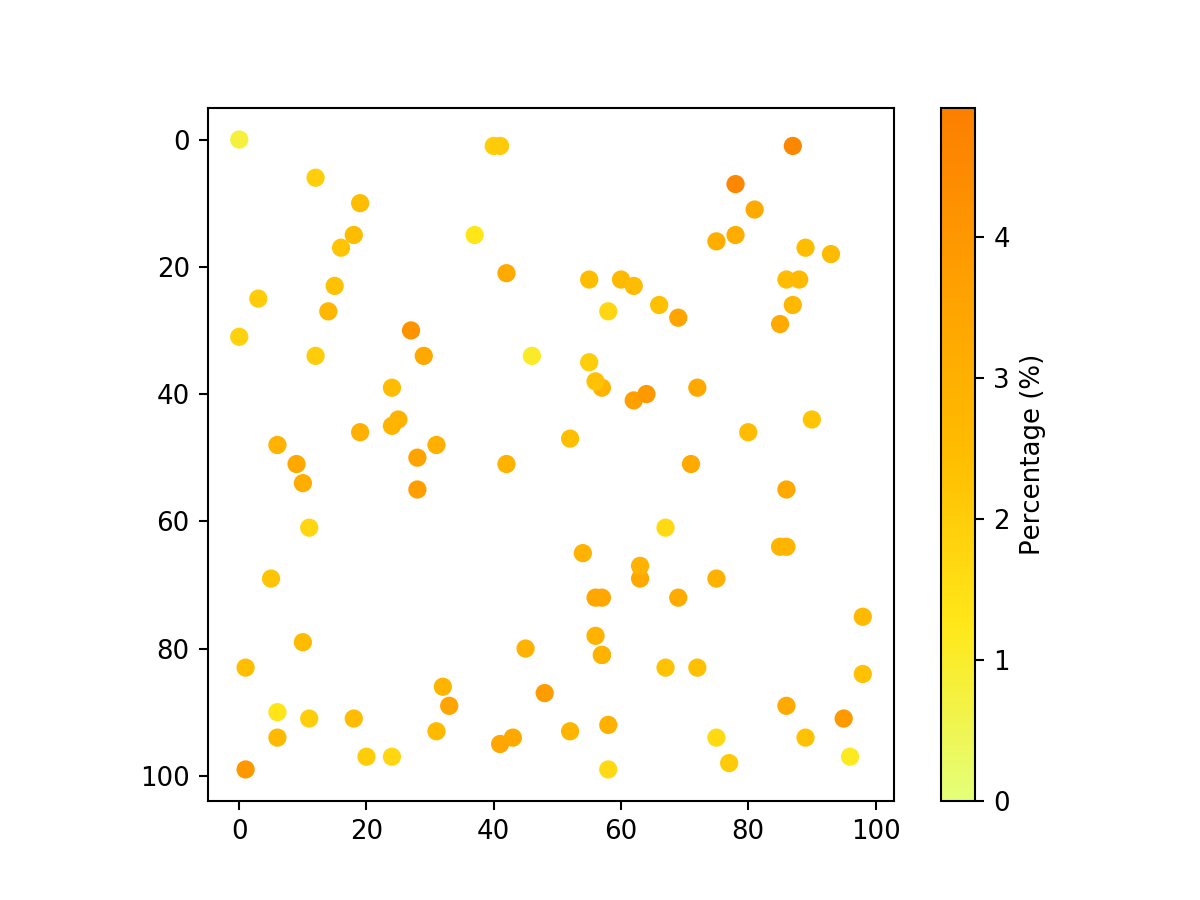

In [179]:
fig, ax = plt.subplots()
original_data = np.array(data)

N = 100

x = np.random.randint(0,100,size=N)
y = np.random.randint(0,100,size=N)

random_sample = original_data[x,y]
ax.set_aspect("equal")
sc = ax.scatter(y,x,c=random_sample, cmap=im.cmap, norm=im.norm)
fig.colorbar(sc, label='Percentage (%)')
ax.invert_yaxis()

fig.savefig('gold_sparse_plot.png')

<IPython.core.display.Javascript object>


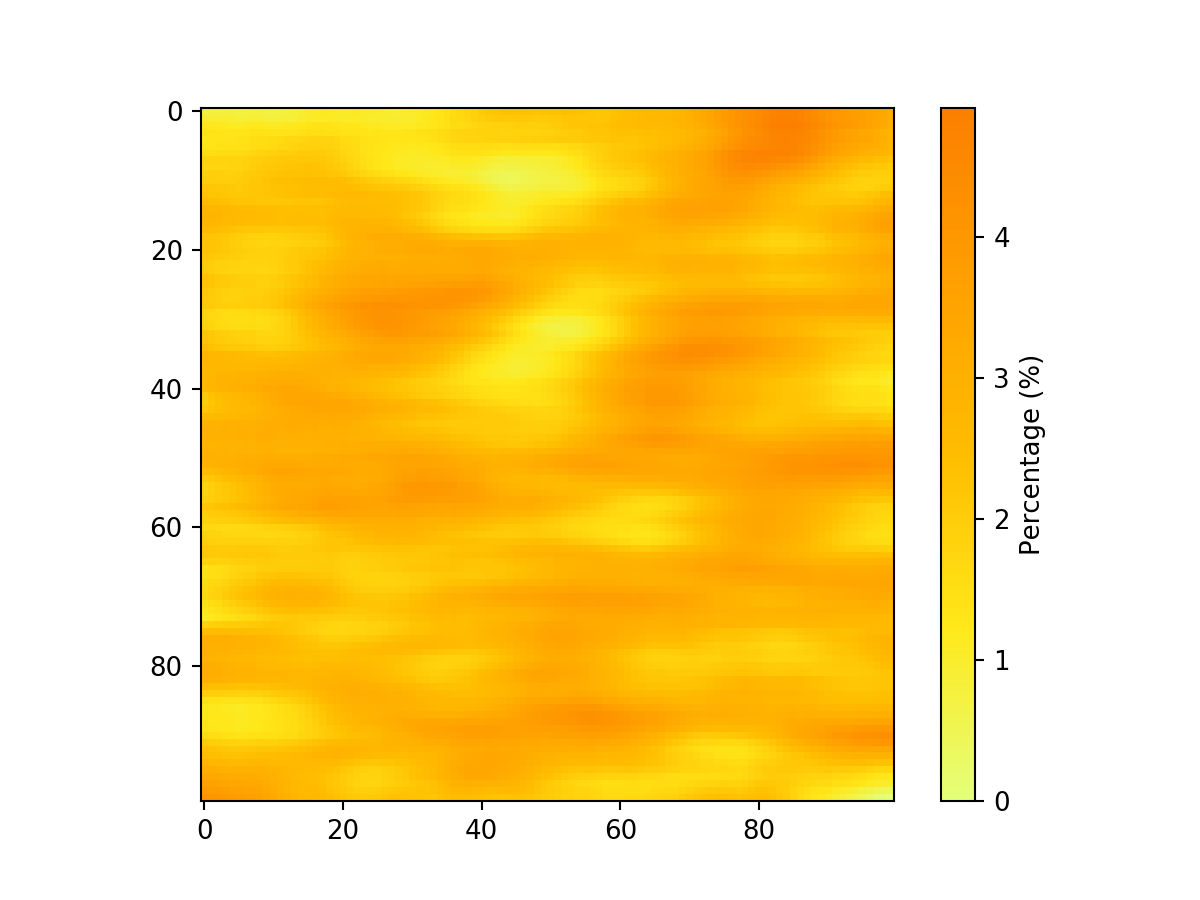

In [180]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap=cm.Wistia)
fig.colorbar(sc, label='Percentage (%)')
fig.savefig('gold_surface_plot.png')

In [167]:
data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.799390,0.767590,0.781722,0.785263,0.765490,0.738883,0.737071,0.784660,0.776646,0.707731,...,4.084495,3.992609,3.921245,3.846513,3.780479,3.714978,3.639283,3.508895,3.340626,3.170672
1,0.967442,0.930148,0.930313,0.922997,0.894916,0.867067,0.864285,0.911638,0.891007,0.814611,...,4.113633,4.002769,3.922109,3.839097,3.762403,3.687709,3.606143,3.469837,3.295546,3.110272
2,1.197870,1.176584,1.170324,1.154273,1.129494,1.116422,1.133894,1.201038,1.196643,1.145104,...,4.201020,4.061229,3.969032,3.869673,3.765851,3.663248,3.564997,3.410722,3.230138,3.030403
3,1.344214,1.343927,1.341401,1.330292,1.308041,1.297874,1.320494,1.390869,1.391232,1.349846,...,4.032111,3.862330,3.756031,3.644627,3.526200,3.416339,3.320604,3.167870,2.985582,2.779225
4,1.261816,1.295241,1.316513,1.327699,1.333816,1.346407,1.394285,1.484680,1.530274,1.537653,...,4.036218,3.876826,3.776855,3.667475,3.543506,3.435257,3.353397,3.213642,3.071360,2.904910
5,1.352375,1.376358,1.395738,1.404700,1.410361,1.415918,1.457372,1.542633,1.583515,1.600880,...,3.879899,3.716003,3.609907,3.495951,3.367161,3.261013,3.190463,3.061097,2.952313,2.812295
6,1.527394,1.548025,1.566076,1.579511,1.596395,1.609758,1.655160,1.739064,1.789892,1.827968,...,3.757238,3.564001,3.434341,3.299992,3.153378,3.036771,2.967188,2.841712,2.768977,2.655207
7,1.792853,1.798161,1.795194,1.790996,1.798179,1.809789,1.854194,1.930062,1.968340,2.009513,...,3.381733,3.169541,3.016913,2.869607,2.722401,2.609168,2.547616,2.434005,2.379937,2.286642
8,1.714728,1.732222,1.730116,1.730694,1.749788,1.786115,1.861456,1.948982,2.011957,2.092138,...,2.977800,2.785192,2.630916,2.488306,2.349664,2.250875,2.207901,2.128316,2.112837,2.062325
9,1.911115,1.917664,1.904218,1.890261,1.897548,1.927651,2.003770,2.080390,2.124951,2.192358,...,2.633205,2.470078,2.331902,2.214698,2.100260,2.029747,2.012239,1.976110,1.985129,1.961857


In [ ]:
cb = fig.colorbar(im)
cb.set_label('percentage (%)')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Gold Percentage over a Mining Area')